In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from scipy.stats import norm
from operator import itemgetter
from sklearn.model_selection import cross_val_score


# Data

In [2]:
dfHistorical = pd.read_csv('Historical_MVPdata.csv')
dfCurrent = pd.read_csv('CurrentMVP.csv')

In [3]:
dfHistorical.head()

,Rank,Player,Age,Tm,Pts Won,Pts Max,Share,G,Team Wins,Overall Seed,...,3P%,FT%,WS,WS/48,VORP,BPM,G-Lockout,Wins-Lockout,WS-Lockout,VORP-Lockout
0,1,Kareem Abdul-Jabbar,32,LAL,147.0,221,0.665,82.0,60.0,2,...,0.000,0.765,14.8,0.227,6.8,6.7,NaN,NaN,NaN,NaN
1,2,Julius Erving,29,PHI,31.5,221,0.143,78.0,59.0,3,...,0.200,0.787,12.5,0.213,6.5,7.2,NaN,NaN,NaN,NaN
2,3,George Gervin,27,SAS,19.0,221,0.086,78.0,41.0,10,...,0.314,0.852,10.6,0.173,3.1,2.2,NaN,NaN,NaN,NaN
3,4,Larry Bird,23,BOS,15.0,221,0.068,82.0,61.0,1,...,0.406,0.836,11.2,0.182,5.4,5.3,NaN,NaN,NaN,NaN
4,5,Tiny Archibald,31,BOS,2.0,221,0.009,80.0,61.0,1,...,0.222,0.830,8.9,0.148,1.5,0.0,NaN,NaN,NaN,NaN


In [4]:
import seaborn as sns

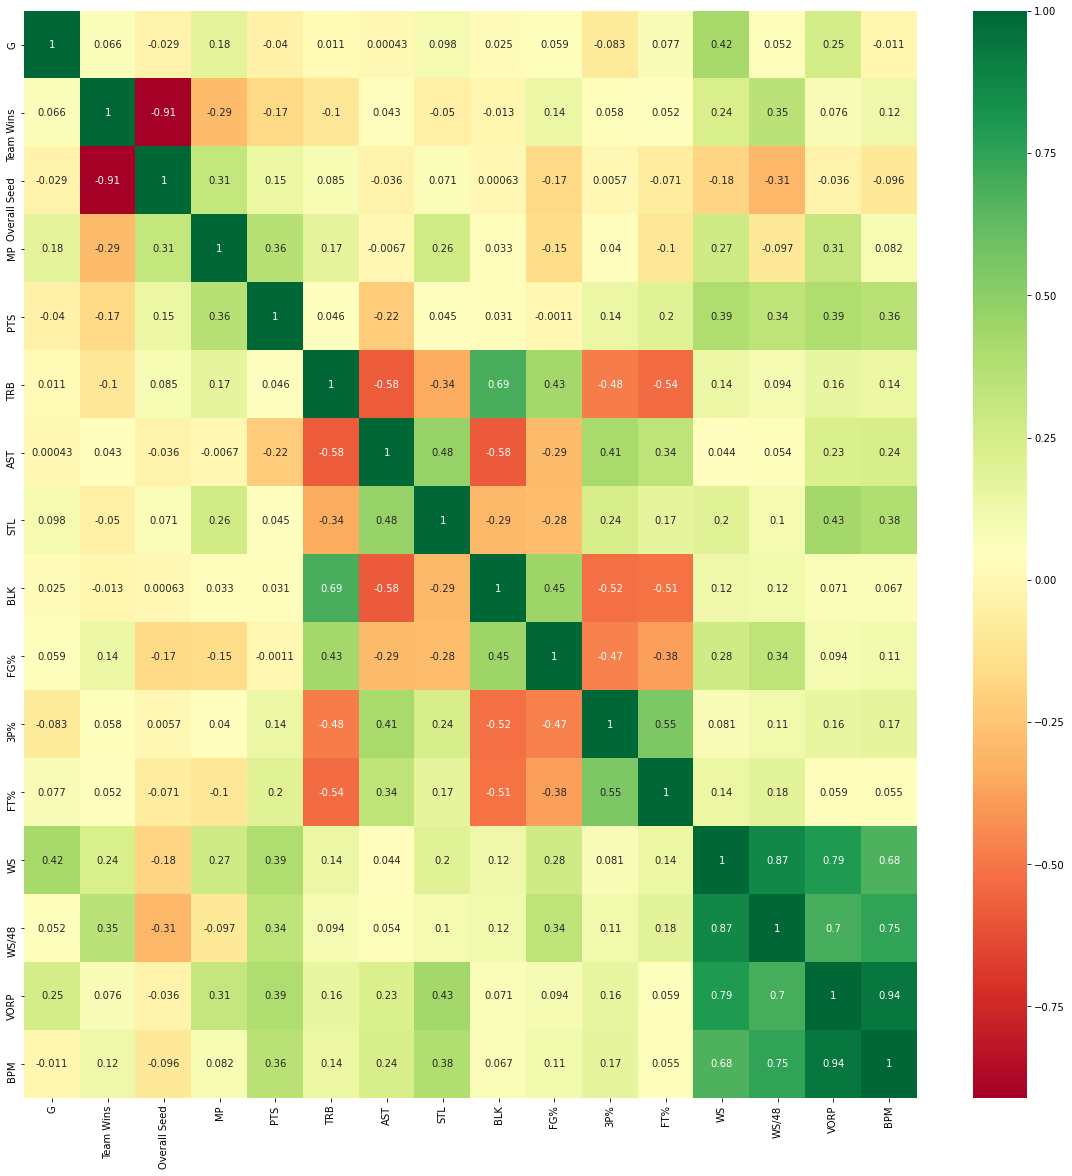

In [5]:
Historical = dfHistorical[['G', 'Team Wins', 'Overall Seed', 'MP', 'PTS', 'TRB', 'AST', 'STL','BLK', 'FG%', '3P%','FT%', 'WS', 'WS/48', 'VORP', 'BPM']]

fig = plt.figure(figsize=(20, 20))

fig.set_facecolor('white')

sns.heatmap(Historical.corr(), annot=True, cmap="RdYlGn")

plt.savefig("corr_matrix.png")

# Models

In [18]:
train, test = train_test_split(dfHistorical, test_size = 0.25, random_state = 10)

xtrain = train[['3P%', 'STL', 'Overall Seed', 'PTS', 'TRB', 'AST', 'FG%', 'VORP', 'WS']]
ytrain = train[['Share']]

xtest = test[['BLK', 'STL', 'Overall Seed', 'PTS', 'TRB', 'AST', 'FG%', 'VORP', 'WS']]
ytest = test[['Share']]

In [19]:
def scores(y, model):
    
    model.fit(xtrain, ytrain.values.ravel())
    y_pred = model.predict(xtest)
    
    print("Mean squared error: %.3f" % mean_squared_error(ytest, y_pred))
    print('R2 score: %.3f' % r2_score(ytest, y_pred))

    cvScore = cross_val_score(model, xtest, ytest.values.ravel(), cv = 3, scoring = 'r2')
    print("R2 cross validation score: %0.2f (+/- %0.2f)" % (cvScore.mean(), cvScore.std() * 2))
    
    for i in y_pred:
        y.append(i)

In [20]:
dnn = MLPRegressor(
    solver='lbfgs',
    hidden_layer_sizes=100,
    max_iter=10000,
    random_state=10,
    activation='identity',
    learning_rate ='invscaling')

y_dnn = []

scores(y_dnn, dnn)

Mean squared error: 0.027
R2 score: 0.681
R2 cross validation score: 0.62 (+/- 0.05)


In [21]:
rf = RandomForestRegressor(random_state = 200, n_estimators = 100, criterion = 'mse')

y_rf = []

scores(y_rf, rf)

Mean squared error: 0.034
R2 score: 0.605
R2 cross validation score: 0.55 (+/- 0.13)


<BarContainer object of 9 artists>

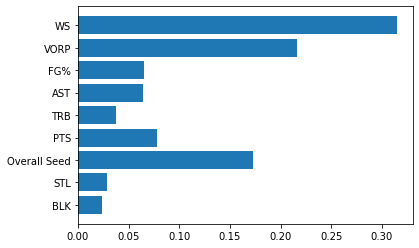

In [24]:
rf.feature_importances_
plt.barh(xtrain.columns, rf.feature_importances_)

In [25]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 9, weights = 'uniform')

y_knn = []

scores(y_knn, knn)

Mean squared error: 0.023
R2 score: 0.726
R2 cross validation score: 0.63 (+/- 0.01)


# Predictions

In [12]:
dfCurrentNames = dfCurrent.iloc[:, 1]
dfCurrentPredict = dfCurrent[['BLK', 'STL', 'Overall Seed', 'PTS', 'TRB', 'AST', 'FG%', 'VORP', 'WS']]

dfCurrent.head(10)

,Rank,Player,Age,Tm,G,Team Wins,Overall Seed,MP,PTS,TRB,...,FT%,WS,WS/48,VORP,BPM,G-Unadjusted,Wins-Unadjusted,WS-Unadjusted,VORP-Unadjusted,Total Games
0,1,Nikola Jokić,26,DEN,82.000000,48.809524,8,35.8,27.1,11.2,...,0.866,18.938095,0.310,10.347619,11.9,42,25,9.7,5.3,42
1,2,Joel Embiid,27,PHI,59.116279,57.209302,1,32.6,29.9,11.5,...,0.859,11.823256,0.294,5.148837,8.6,31,30,6.2,2.7,43
2,3,Giannis Antetokounmpo,26,MIL,80.000000,54.000000,7,34.2,29.0,11.7,...,0.679,14.200000,0.250,13.200000,11.5,40,27,7.1,6.6,41
3,4,James Harden,31,BRK,70.558140,55.302326,3,37.9,25.3,8.0,...,0.866,11.823256,0.211,5.720930,6.5,37,29,6.2,3.0,43
4,5,Damian Lillard,30,POR,80.047619,48.809524,9,36.0,30.3,4.4,...,0.940,13.080952,0.217,6.052381,6.3,41,25,6.7,3.1,42
5,6,LeBron James,36,LAL,78.186047,53.395349,4,33.9,25.4,7.9,...,0.703,10.869767,0.199,6.483721,7.8,41,28,5.7,3.4,43
6,7,Luka Dončić,22,DAL,76.000000,44.000000,11,35.4,29.0,8.4,...,0.750,10.200000,0.181,6.600000,7.7,38,22,5.1,3.3,41
7,8,Kawhi Leonard,29,LAC,66.744186,51.488372,6,34.5,26.0,6.3,...,0.870,11.251163,0.233,4.767442,6.3,35,27,5.9,2.5,43
8,9,Kyrie Irving,28,BRK,59.116279,55.302326,3,35.6,28.1,4.8,...,0.891,8.581395,0.195,3.623256,4.9,31,29,4.5,1.9,43
9,10,Rudy Gobert,28,UTA,82.000000,60.000000,2,31.0,14.4,13.5,...,0.596,11.600000,0.220,3.600000,3.5,41,30,5.8,1.8,41


# DNN

In [13]:
dnnPredict = dnn.predict(dfCurrentPredict)
dnnPredict = dnnPredict.tolist()

for (i, j) in zip(dfCurrentNames, dnnPredict):
    print(i, j)

Nikola Jokić 0.6780258204820842
Joel Embiid 0.46876102686946386
Giannis Antetokounmpo 0.6098283350960929
James Harden 0.4988280137200526
Damian Lillard 0.3764747263454937
LeBron James 0.362057077233756
Luka Dončić 0.3070896980717645
Kawhi Leonard 0.1860312946526318
Kyrie Irving 0.18730173359013963
Rudy Gobert 0.08033401086079439


In [14]:
dnnListUnsorted = [[i, j] for i, j in zip(dfCurrentNames, dnnPredict)]
dnnDataUnsorted = [row[1] for row in dnnListUnsorted]
dnnList = sorted(dnnListUnsorted, key = itemgetter(1), reverse = True)

dnnData = [row[1] for row in dnnList]
dnnNames = [row[0] for row in dnnList]
print(dnnList)

x_dnn = np.arange(len(dnnData))

[['Nikola Jokić', 0.6780258204820842], ['Giannis Antetokounmpo', 0.6098283350960929], ['James Harden', 0.4988280137200526], ['Joel Embiid', 0.46876102686946386], ['Damian Lillard', 0.3764747263454937], ['LeBron James', 0.362057077233756], ['Luka Dončić', 0.3070896980717645], ['Kyrie Irving', 0.18730173359013963], ['Kawhi Leonard', 0.1860312946526318], ['Rudy Gobert', 0.08033401086079439]]


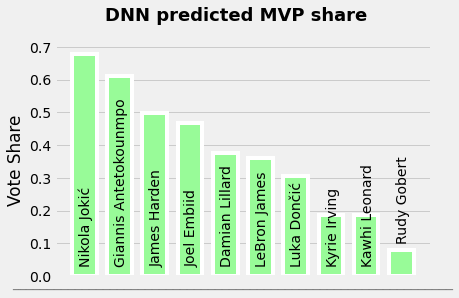

In [15]:
plt.style.use('fivethirtyeight')

dnn, ax = plt.subplots()

ax.bar(x_dnn, dnnData, width = .7, edgecolor = 'white', color = 'palegreen', linewidth = 4, label = 'Predicted')

labels = dnnNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 8:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 8:
        height = .03
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
dnn.suptitle("DNN predicted MVP share", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")

dnn.text(x = -0.02, y = 0.03,
    s = '_______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')


dnn.savefig('dnn.png', dpi = 400, bbox_inches = 'tight')

# RF

In [16]:
rfPredict = rf.predict(dfCurrentPredict)
rfPredict = rfPredict.tolist()

for (i, j) in zip(dfCurrentNames, rfPredict):
    print(i, j)

Nikola Jokić 0.62912
Joel Embiid 0.26959000000000005
Giannis Antetokounmpo 0.60003
James Harden 0.35357999999999995
Damian Lillard 0.25569000000000003
LeBron James 0.16544000000000003
Luka Dončić 0.1943000000000001
Kawhi Leonard 0.08098999999999996
Kyrie Irving 0.15188000000000004
Rudy Gobert 0.35328000000000004


In [17]:
rfListUnsorted = [[i, j] for i, j in zip(dfCurrentNames, rfPredict)]
rfDataUnsorted = [row[1] for row in rfListUnsorted]
rfList = sorted(rfListUnsorted, key = itemgetter(1), reverse = True)

rfData = [row[1] for row in rfList]
rfNames = [row[0] for row in rfList]
print(rfList)

x_rf = np.arange(len(rfData))

[['Nikola Jokić', 0.62912], ['Giannis Antetokounmpo', 0.60003], ['James Harden', 0.35357999999999995], ['Rudy Gobert', 0.35328000000000004], ['Joel Embiid', 0.26959000000000005], ['Damian Lillard', 0.25569000000000003], ['Luka Dončić', 0.1943000000000001], ['LeBron James', 0.16544000000000003], ['Kyrie Irving', 0.15188000000000004], ['Kawhi Leonard', 0.08098999999999996]]


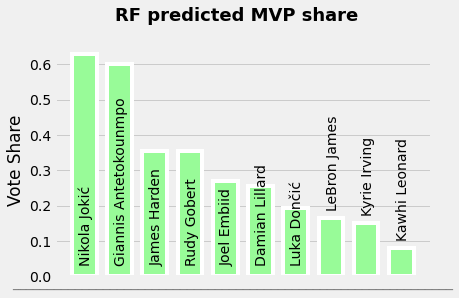

In [19]:
plt.style.use('fivethirtyeight')

rf, ax = plt.subplots()

ax.bar(x_rf, rfData, width = .7, edgecolor = 'white', color = 'palegreen', linewidth = 4, label = 'Predicted')

labels = rfNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 6:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 6:
        height = .03
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
rf.suptitle("RF predicted MVP share", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")

rf.text(x = -0.02, y = 0.03,
    s = '_______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')


rf.savefig('rf.jpeg', dpi = 400, bbox_inches = 'tight')

# KNN

In [20]:
knnPredict = knn.predict(dfCurrentPredict)
knnPredict = knnPredict.tolist()

for (i, j) in zip(dfCurrentNames, knnPredict):
    print(i, j)

Nikola Jokić 0.48733333333333323
Joel Embiid 0.49877777777777776
Giannis Antetokounmpo 0.43466666666666665
James Harden 0.41144444444444445
Damian Lillard 0.209
LeBron James 0.21433333333333335
Luka Dončić 0.17066666666666666
Kawhi Leonard 0.12166666666666666
Kyrie Irving 0.1771111111111111
Rudy Gobert 0.08211111111111111


In [21]:
knnListUnsorted = [[i, j] for i, j in zip(dfCurrentNames, knnPredict)]
knnDataUnsorted = [row[1] for row in knnListUnsorted]
knnList = sorted(knnListUnsorted, key = itemgetter(1), reverse = True)

knnData = [row[1] for row in knnList]
knnNames = [row[0] for row in knnList]
print(knnList)

x_knn = np.arange(len(knnData))

[['Joel Embiid', 0.49877777777777776], ['Nikola Jokić', 0.48733333333333323], ['Giannis Antetokounmpo', 0.43466666666666665], ['James Harden', 0.41144444444444445], ['LeBron James', 0.21433333333333335], ['Damian Lillard', 0.209], ['Kyrie Irving', 0.1771111111111111], ['Luka Dončić', 0.17066666666666666], ['Kawhi Leonard', 0.12166666666666666], ['Rudy Gobert', 0.08211111111111111]]


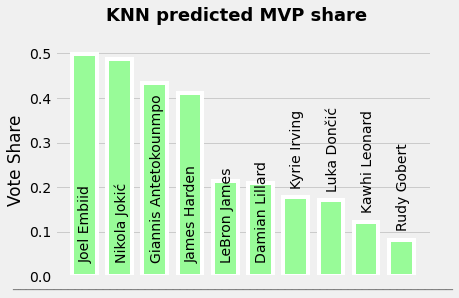

In [22]:
plt.style.use('fivethirtyeight')

knn, ax = plt.subplots()

ax.bar(x_knn, knnData, width = .7, edgecolor = 'white', color = 'palegreen', linewidth = 4, label = 'Predicted')

labels = knnNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 5:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 5:
        height = .03
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
knn.suptitle("KNN predicted MVP share", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")

knn.text(x = -0.02, y = 0.03,
    s = '_______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')


knn.savefig('knn.jpeg', dpi = 400, bbox_inches = 'tight')

# Average Results

In [23]:
avgPredict = []

for (i, j, h) in zip(rfDataUnsorted, knnDataUnsorted, dnnDataUnsorted):
    avgPredict.append((i + j + h) / 3)

avgList = [[i, j] for i, j in zip(dfCurrentNames, avgPredict)]
avgList = sorted(avgList, key = itemgetter(1), reverse = True)

avgData = [row[1] for row in avgList]
avgNames = [row[0] for row in avgList]
print(avgList)

x_avg = np.arange(len(avgData))

[['Nikola Jokić', 0.5981597179384724], ['Giannis Antetokounmpo', 0.5481750005875865], ['James Harden', 0.421284152721499], ['Joel Embiid', 0.4123762682157472], ['Damian Lillard', 0.2803882421151646], ['LeBron James', 0.24727680352236314], ['Luka Dončić', 0.22401878824614374], ['Kyrie Irving', 0.1720976149004169], ['Rudy Gobert', 0.1719083739906352], ['Kawhi Leonard', 0.12956265377309947]]


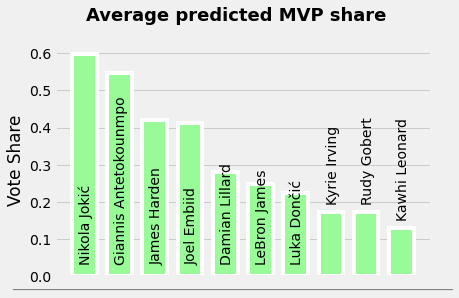

In [24]:
plt.style.use('fivethirtyeight')

avg, ax = plt.subplots()

ax.bar(x_avg, avgData, width = .7, edgecolor = 'white', color = 'palegreen', linewidth = 4, label = 'Predicted')

labels = avgNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 6:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 6:
        height = .03
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
avg.suptitle("Average predicted MVP share", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")

avg.text(x = -0.02, y = 0.03,
    s = '_______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')


avg.savefig('avg.jpeg', dpi = 400, bbox_inches = 'tight')